In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.datasets import mnist
from keras import optimizers
import numpy as np
import keras
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.image as mpimg
import numpy as np
import random

Using TensorFlow backend.


In [2]:
#load Mnist data
(x_train, y_train), (x_test, y_test)= mnist.load_data()

3

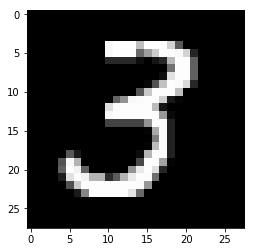

In [3]:
#Show a random sample of the data 
index = random.randint(1,1000)
sample = x_train[index].reshape(28,28)
display(y_train[index])
plt.imshow(sample, cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
#Onehot encode the data to binary labels 
train_labels = keras.utils.to_categorical(y_train , num_classes = 10 )
test_labels = keras.utils.to_categorical(y_test , num_classes = 10 )

In [5]:
#Regular Label
idx = random.randint(1,1000)
y_train[idx]

6

In [6]:
#Onehot Encoded Label
train_labels[idx]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

In [9]:
#Reshape the image according to the nessecary format

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28 , 28)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], 28 , 28 , 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)


In [10]:
#Present DataShape
x_train.shape

(60000, 28, 28, 1)

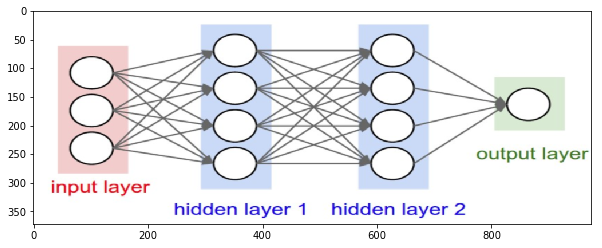

In [19]:
#Show photo below
img=mpimg.imread('NN.png')
imgplot = plt.imshow(img)
plt.show()
plt.rcParams["figure.figsize"] = (15,20)

In [13]:
#Build Fully connected neural network
model = Sequential()

#Firsr step : Reshape from 28*28 to flat 
model.add(Flatten( input_shape= input_shape ))
#First Hidden layer , 64 Nodes , activation function = relu (non-linear) , Dropout = 25 %
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
# Second Hidden Layer , 32 nodes.
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
#Last Layer , num_classes = 10 , activation = softmax ( Multi-class probablities ) 
model.add(Dense(10, activation='softmax'))
# Defining loss & Optimzers methods 
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# Train the model + Hyperparameters
model.fit(x_train, train_labels,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, test_labels))
#Print Model structure
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 8.0686 - acc: 0.4839 - val_loss: 4.9592 - val_acc: 0.6857
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 5.4926 - acc: 0.6458 - val_loss: 4.2653 - val_acc: 0.7304
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 4.9337 - acc: 0.6822 - val_loss: 4.0905 - val_acc: 0.7408
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 4.6356 - acc: 0.7009 - val_loss: 4.0291 - val_acc: 0.7451
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 3.2601 - acc: 0.7577 - val_loss: 0.9817 - val_acc: 0.8833
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 1.3203 - acc: 0.7828 - val_loss: 0.5780 - val_acc: 0.8792
Epoch 7/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.9446 - acc: 0.8131 - val_loss: 0.5116 - val_acc

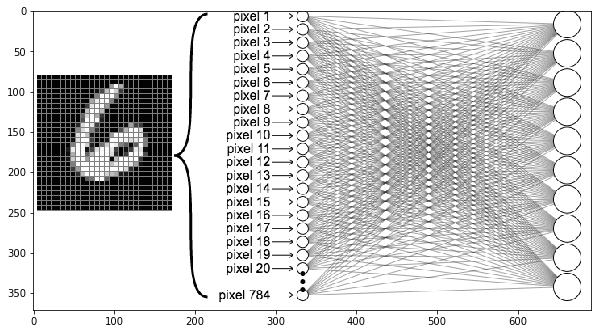

In [18]:
#Show photo below
img=mpimg.imread('mnist_fully.png')
imgplot = plt.imshow(img)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [16]:
#Build Convolutional Neural Network

model = Sequential()

#First convultion layer , 26*26*32
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape ))
model.add(Dropout(0.25))

#Second convultion layer , 24*24*16
model.add(Conv2D(16, (3, 3), activation='relu' ))
model.add(Dropout(0.25))

# Reshape from 24*24*16 to flat 
model.add(Flatten())

# Fully connected layer , 128 nodes.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

#Last Layer, num_classes = 10 , activation = softmax ( Multi-class probablities ) 
model.add(Dense(10, activation='softmax'))

# Defining loss & Optimzers methods 
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train the model + Hyperparameters
model.fit(x_train, train_labels,
          batch_size=256,
          epochs=2,
          validation_data=(x_test, test_labels))

#Print model summary
model.summary()


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 107s 2ms/step - loss: 5.7386 - acc: 0.6194 - val_loss: 0.1997 - val_acc: 0.9409
Epoch 2/2
60000/60000 [==============================] - 110s 2ms/step - loss: 0.1950 - acc: 0.9471 - val_loss: 0.0701 - val_acc: 0.9786
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
flatten_4 (Flatt

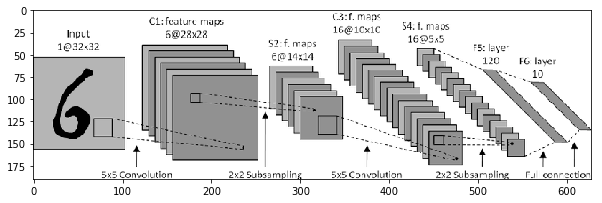

In [17]:
#Show photo below
img=mpimg.imread('conv.png')
imgplot = plt.imshow(img)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()